## Tarea 3 Visualizacion de datos

# SARS-CoV-2, Pandemia, vacunas y sus efectos en la mortalidad
### En este notebook analizaremos los beneficios que trajo de la vacunación al momento de enfrentarnos a la pandemia que trajo consigo más de 4.5 MM de muertes a nivel mundial
Para esto utilizaremos el dataset "COVID vaccination vs. mortality"

In [16]:
#%pip install vega_datasets
from vega_datasets import data
import pandas as pd
import plotly as plty
import altair as alt
import datetime as dt 
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
#cargar el dataset
df = pd.read_csv("covid-vaccination-vs-death_ratio.csv")
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32911 entries, 0 to 32910
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               32911 non-null  int64  
 1   country                  32911 non-null  object 
 2   iso_code                 32911 non-null  object 
 3   date                     32911 non-null  object 
 4   total_vaccinations       32911 non-null  float64
 5   people_vaccinated        32911 non-null  float64
 6   people_fully_vaccinated  32911 non-null  float64
 7   New_deaths               32911 non-null  int64  
 8   population               32911 non-null  float64
 9   ratio                    32911 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.5+ MB


Unnamed: 0                 0
country                    0
iso_code                   0
date                       0
total_vaccinations         0
people_vaccinated          0
people_fully_vaccinated    0
New_deaths                 0
population                 0
ratio                      0
dtype: int64

In [18]:
print('cantidad de location:')
print("Hay",df['country'].nunique(),"países en el dataset")
print(df['country'].unique())


cantidad de location:
Hay 197 países en el dataset
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cambodia' 'Cameroon' 'Canada' 'Cabo Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Estonia' 'Ethiopia'
 'Falkland Islands (Malvinas)' 'Fiji' 'Finland' 'France'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Hondura

In [19]:
display(df.head())

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.111781
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.164941
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40374668.0,1.179866
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40374668.0,1.187309
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40374668.0,1.187809


In [20]:
df.nunique()

Unnamed: 0                 32911
country                      197
iso_code                     197
date                         472
total_vaccinations         32538
people_vaccinated          32251
people_fully_vaccinated    31735
New_deaths                  1459
population                   197
ratio                      32369
dtype: int64

In [21]:
#df = df.drop(columns=['Unnamed: 0'])
display(df.head())

,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.111781
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.164941
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40374668.0,1.179866
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40374668.0,1.187309
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40374668.0,1.187809


In [22]:
# 1. Preparación de datos (Agrupado por mes para optimizar)
df['date'] = pd.to_datetime(df['date'])

df_monthly = df.set_index('date').resample('ME').agg({ # Usa 'M' si 'ME' da error en pandas viejos
    'people_vaccinated': 'max',
    'New_deaths': 'sum'
}).reset_index()

# 2. Configuración común
scale_colors = alt.Scale(
    domain=['Personas Vacunadas', 'Nuevas Muertes'], 
    range=['green', 'red']
)

# Base con formato de fecha mostrando el Año
base = alt.Chart(df_monthly).encode(
    x=alt.X('date:T', 
            title='Fecha', 
            axis=alt.Axis(format='%Y-%m', labelAngle=-45)) # Formato Año-Mes
)

# Definición de líneas
line_vaccine = base.transform_calculate(
    tipo="'Personas Vacunadas'"
).mark_line(interpolate='monotone').encode(
    y=alt.Y('people_vaccinated:Q', title='Cantidad'), # Título genérico inicial
    color=alt.Color('tipo:N', 
                    scale=scale_colors, 
                    legend=alt.Legend(title='Indicador', 
                                      orient='bottom-right', # <--- Leyenda abajo a la derecha
                                      fillColor='white',
                                      padding=5))
)

line_deaths = base.transform_calculate(
    tipo="'Nuevas Muertes'"
).mark_line(interpolate='monotone').encode(
    y=alt.Y('New_deaths:Q', title='Cantidad'),
    color=alt.Color('tipo:N', scale=scale_colors)
)

# --- VERSIÓN 2: Escala Independiente (Doble Eje Y) ---
# Ajustamos los ejes para que tengan títulos y colores específicos a cada lado
line_vaccine_dual = line_vaccine.encode(
    y=alt.Y('people_vaccinated:Q', 
            axis=alt.Axis(title='Personas Vacunadas (Acumulado)', titleColor='green'))
)

line_deaths_dual = line_deaths.encode(
    y=alt.Y('New_deaths:Q', 
            axis=alt.Axis(title='Nuevas Muertes Mensuales', titleColor='red'))
)

grafico_doble_eje = alt.layer(
    line_vaccine_dual, 
    line_deaths_dual
).properties(
    title='Comparativa 2: Escalas Independientes (Doble Eje Y)',
    width=700,
    height=400
).resolve_scale(
    y='independent' # <--- Esto separa los ejes
)

display(grafico_doble_eje)

alt.LayerChart(...)

In [33]:
# 1. PREPARACIÓN DE DATOS
# Aseguramos que existe la columna de muertes totales absolutas
if 'total_deaths' not in df.columns:
    df['total_deaths'] = df.groupby('country')['New_deaths'].cumsum()

if 'population' in df.columns:
    df['total_deaths_per_million'] = (df['total_deaths'] / df['population']) * 1_000_000

# 2. FILTRAR LOS TOP 10 PAÍSES (Criterio: Muertes ABSOLUTAS)
top_countries = df.groupby('country')['total_deaths'].max().nlargest(5).index.tolist()
df_top10 = df[df['country'].isin(top_countries)]

# 3. GRÁFICOS

# Gráfico 1: Spaghetti Chart (Sin cambios)
spaghetti_chart = alt.Chart(df_top10).mark_line(opacity=0.8, strokeWidth=2).encode(
    x=alt.X('yearmonth(date):T', title='Fecha'),
    y=alt.Y('sum(New_deaths):Q', title='Nuevas Muertes Mensuales (Absoluto)'),
    color=alt.Color('country:N', title='País', legend=alt.Legend(columns=2)),
    tooltip=['country', 'yearmonth(date)', 'sum(New_deaths)']
).properties(
    title='Evolución: Los 5 Países con mayor mortalidad',
    width=700,
    height=400
)

# Gráfico 2: Ranking Chart (MODIFICADO: Colores distintos por país)
ranking_chart = alt.Chart(df_top10).mark_bar().encode(
    x=alt.X('max(total_deaths):Q', title='Total Muertes Acumuladas'),
    y=alt.Y('country:N', sort='-x', title='País'), 
    # CAMBIO AQUÍ: Usamos 'country' para el color en lugar de un valor fijo
    color=alt.Color('country:N', legend=None), 
    tooltip=[
        alt.Tooltip('country', title='País'),
        alt.Tooltip('max(total_deaths)', title='Muertes Totales', format=','),
        alt.Tooltip('max(total_deaths_per_million)', title='Muertes x Millón', format=',.0f')
    ]
).properties(
    title='Ranking top 10: Impacto Acumulado',
    width=700,
    height=300
)

display(spaghetti_chart)
display(ranking_chart)

alt.Chart(...)

alt.Chart(...)

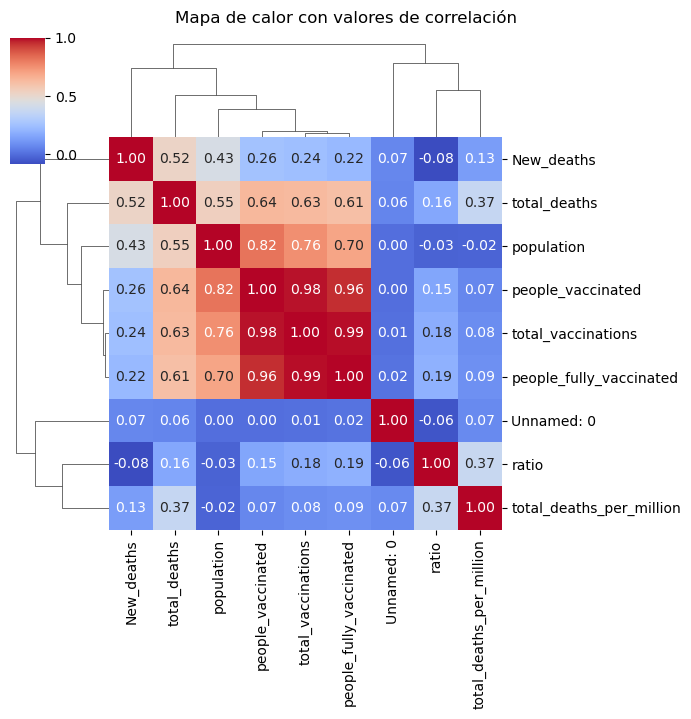

In [24]:
sns.clustermap(
    df.select_dtypes(include='number').corr(), 
    cmap="coolwarm", 
    figsize=(7, 7), 
    annot=True, 
    fmt=".2f"
)

plt.suptitle("Mapa de calor con valores de correlación", y=1.02)
plt.show()

In [25]:
# 1. PREPARACIÓN DE DATOS
# Aseguramos formato de fecha
df['date'] = pd.to_datetime(df['date'])

# Si no existe 'total_deaths', lo creamos para poder filtrar el top 3
if 'total_deaths' not in df.columns:
    df['total_deaths'] = df.groupby('country')['New_deaths'].cumsum()

# Identificamos los Top 3 países con más muertes acumuladas
top_3_countries = df.groupby('country')['total_deaths'].max().nlargest(3).index.tolist()
df_top3 = df[df['country'].isin(top_3_countries)]

# Agrupamos por mes para suavizar y reducir datos (evita el error de max rows)
df_grouped = df_top3.set_index('date').groupby('country').resample('ME').agg({
    'ratio': 'max',          # Ratio de vacunación (acumulativo) -> tomamos el máximo del mes
    'New_deaths': 'sum',     # Nuevas muertes (flujo) -> sumamos el total del mes
    'population': 'max'      # Población constante
}).reset_index()

# Calculamos la Tasa de Muerte por Millón (para normalizar la "tasa")
df_grouped['death_rate_per_million'] = (df_grouped['New_deaths'] / df_grouped['population']) * 1_000_000

# --- 2. CREACIÓN DE GRÁFICOS INDIVIDUALES ---
lista_graficos = []

for pais in top_3_countries:
    # Filtramos datos solo para este país
    datos_pais = df_grouped[df_grouped['country'] == pais]
    
    base = alt.Chart(datos_pais).encode(
        x=alt.X('date:T', title='Fecha', axis=alt.Axis(format='%Y-%m'))
    )

    # Línea 1: Vacunación (Punteada, Cian)
    line_vaccine = base.mark_line(strokeDash=[5, 5], strokeWidth=3).encode(
        y=alt.Y('ratio:Q', title='Ratio Vacunación (%)', axis=alt.Axis(titleColor='#00A388')),
        color=alt.value('#00A388'),
        tooltip=['country', 'date', alt.Tooltip('ratio', format='.2f')]
    )

    # Línea 2: Muertes (Sólida, Rojo/Naranja)
    line_death = base.mark_line(strokeWidth=3).encode(
        y=alt.Y('death_rate_per_million:Q', title='Tasa Muertes x Millón', axis=alt.Axis(titleColor='#FF5733')),
        color=alt.value('#FF5733'),
        tooltip=['country', 'date', alt.Tooltip('death_rate_per_million', format='.1f')]
    )

    # Combinamos las capas y resolvemos la escala SOLO para este gráfico
    layer = alt.layer(
        line_vaccine, 
        line_death
    ).resolve_scale(
        y='independent'
    ).properties(
        title=pais, # Título individual
        width=220,  # Ancho ajustado para que quepan los 3
        height=300
    )
    
    lista_graficos.append(layer)

# --- 3. CONCATENACIÓN HORIZONTAL ---
# Usamos reduce para unir todos los gráficos de la lista
chart_final = alt.hconcat(*lista_graficos).properties(
    title='Efecto de la Vacuna: Inmunización (Cian) vs Tasa de Muertes (Rojo) - Top 3 Países'
)

display(chart_final)

alt.HConcatChart(...)

In [26]:
# --- 1. PREPARACIÓN DE DATOS GLOBAL ---
df['date'] = pd.to_datetime(df['date'])

# Calculamos la tasa por millón a nivel fila (diario por país) si no existe
# Esto es necesario para luego poder sacar el promedio global de esta tasa
if 'population' in df.columns:
    df['death_rate_per_million'] = (df['New_deaths'] / df['population']) * 1_000_000
else:
    # Fallback por si no hay población, usamos muertes directas
    df['death_rate_per_million'] = df['New_deaths']

# Agrupamos SOLO por fecha (Month End) para obtener el promedio mundial
# .mean() aquí colapsa todos los países en un solo valor por mes
df_global = df.set_index('date').resample('ME').agg({
    'ratio': 'mean',                    # Promedio del avance de vacunación
    'death_rate_per_million': 'mean'    # Promedio de la tasa de mortalidad
}).reset_index()

# --- 2. CREACIÓN DEL GRÁFICO ---
base = alt.Chart(df_global).encode(
    x=alt.X('date:T', title='Fecha', axis=alt.Axis(format='%Y-%m'))
)

# Línea 1: Ratio Vacunación Promedio (Punteada, Cian)
line_vaccine = base.mark_line(strokeDash=[5, 5], strokeWidth=3).encode(
    y=alt.Y('ratio:Q', 
            title='Promedio Global: Ratio Vacunación (%)', 
            axis=alt.Axis(titleColor='#00A388')),
    color=alt.value('#00A388'), # Mismo color cian/verde
    tooltip=['date', alt.Tooltip('ratio', format='.2f')]
)

# Línea 2: Tasa Muertes Promedio (Sólida, Rojo/Naranja)
line_death = base.mark_line(strokeWidth=3).encode(
    y=alt.Y('death_rate_per_million:Q', 
            title='Promedio Global: Muertes x Millón', 
            axis=alt.Axis(titleColor='#FF5733')),
    color=alt.value('#FF5733'), # Mismo color rojo/naranja
    tooltip=['date', alt.Tooltip('death_rate_per_million', format='.2f')]
)

# --- 3. COMBINACIÓN ---
chart_global = alt.layer(
    line_vaccine, 
    line_death
).resolve_scale(
    y='independent' # Escalas independientes
).properties(
    title='Tendencia Mundial: Vacunación vs Mortalidad Promedio',
    width=700,
    height=400
)

display(chart_global)

alt.LayerChart(...)

In [27]:
# 1. PREPARACIÓN DE DATOS
# Aseguramos formato de fecha
df['date'] = pd.to_datetime(df['date'])

# Identificamos el Top 5 países por muertes totales (suma de todo el periodo)
top_5_countries = df.groupby('country')['New_deaths'].sum().nlargest(5).index.tolist()
df_top5 = df[df['country'].isin(top_5_countries)]

# Agrupamos por mes y país (Pre-cálculo para optimizar el gráfico)
df_stacked = df_top5.set_index('date').groupby('country').resample('ME').agg({
    'New_deaths': 'sum' # Sumamos las muertes de cada mes
}).reset_index()

# 2. CREACIÓN DEL GRÁFICO
stacked_area = alt.Chart(df_stacked).mark_area().encode(
    x=alt.X('date:T', title='Fecha', axis=alt.Axis(format='%Y-%m')),
    y=alt.Y('New_deaths:Q', title='Nuevas Muertes (Volumen Mensual)'), 
    color=alt.Color('country:N', 
                    title='País',
                    # Mantenemos tu preferencia de leyenda
                    legend=alt.Legend(orient='top-left', # La moví arriba izq para que no tape el área final
                                      fillColor='white', 
                                      padding=5, 
                                      columns=1)), 
    tooltip=[
        alt.Tooltip('country', title='País'),
        alt.Tooltip('date', title='Fecha', format='%Y-%m'),
        alt.Tooltip('New_deaths', title='Muertes Mensuales', format=',')
    ]
).properties(
    title='Contribución: Top 5 Países en Nuevas Muertes Globales',
    width=700,
    height=400
)

display(stacked_area)

alt.Chart(...)

In [28]:
# 1. CONFIGURACIÓN
url_geojson = 'https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/world-countries.json'
fuente_mapa = alt.Data(url=url_geojson, format=alt.DataFormat(property='features', type='json'))

# 1. LIMPIEZA Y PREPARACIÓN
# Eliminamos columna basura si existe
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

df['date'] = pd.to_datetime(df['date'])

df['new_deaths_per_million'] = (df['New_deaths'] / df['population']) * 1_000_000

# 2. DEFINIR PERIODOS
fecha_min = df['date'].min()
fecha_max = df['date'].max()
corte_inicio = fecha_min + pd.DateOffset(months=3)
corte_fin = fecha_max - pd.DateOffset(months=3)

df_vac_inicio = df[df['date'] <= corte_inicio].groupby('iso_code')[['ratio', 'country']].max().reset_index()
df_vac_fin = df[df['date'] >= corte_fin].groupby('iso_code')[['ratio', 'country']].max().reset_index()

df_death_inicio = df[df['date'] <= corte_inicio].groupby('iso_code').agg({
    'new_deaths_per_million': 'sum', 
    'country': 'first'
}).reset_index()

df_death_fin = df[df['date'] >= corte_fin].groupby('iso_code').agg({
    'new_deaths_per_million': 'sum', 
    'country': 'first'
}).reset_index()
def graficar_mapa_capas(datos, columna_valor, titulo, esquema_color, dominio=None):
    
    fondo = alt.Chart(fuente_mapa).mark_geoshape(
        fill='#d3d3d3',
        stroke='white',
        strokeWidth=0.2
    ).project(
        type='equalEarth'
    )
    
    escala = alt.Scale(scheme=esquema_color, domain=dominio) if dominio else alt.Scale(scheme=esquema_color)
    
    datos_color = alt.Chart(fuente_mapa).mark_geoshape(
        stroke='white',
        strokeWidth=0.2
    ).encode(
        color=alt.Color(f'{columna_valor}:Q', 
                        scale=escala, 
                        legend=alt.Legend(title=titulo)),
        tooltip=[
            alt.Tooltip('properties.name:N', title='País'),
            alt.Tooltip(f'{columna_valor}:Q', title='Valor', format='.1f')
        ]
    ).transform_lookup(
        lookup='id',                
        from_=alt.LookupData(datos, 'iso_code', [columna_valor, 'country'])
    ).transform_filter(
        f'isValid(datum.{columna_valor})' 
    ).project(
        type='equalEarth'
    )

    return alt.layer(fondo, datos_color).properties(
        width=500, 
        height=300, 
        title=titulo
    )

# VACUNACIÓN
map_vac_1 = graficar_mapa_capas(df_vac_inicio, 'ratio', 'Vacunación: Primeros 3 Meses', 'viridis', [0, 100])
map_vac_2 = graficar_mapa_capas(df_vac_fin, 'ratio', 'Vacunación: Últimos 3 Meses', 'viridis', [0, 100])

dashboard_vacunas = alt.hconcat(map_vac_1, map_vac_2).properties(
    title='Evolución Global porcentual de la Vacunación (Gris = Sin dato)'
)
display(dashboard_vacunas)

# MORTALIDAD
map_death_1 = graficar_mapa_capas(df_death_inicio, 'new_deaths_per_million', 'Suma de Muertes/Millón: Primeros 3 Meses', 'reds', dominio=None)
map_death_2 = graficar_mapa_capas(df_death_fin, 'new_deaths_per_million', 'Suma de Muertes/Millón: Últimos 3 Meses', 'reds', dominio=None)

dashboard_muertes = alt.hconcat(map_death_1, map_death_2).resolve_scale(
    color='independent'
).properties(
    title='Mortalidad acumulada por país (Gris = Sin dato)'
)
display(dashboard_muertes)

alt.HConcatChart(...)

alt.HConcatChart(...)

In [34]:
# 1. PREPARAR DATOS (1 Fila por País)
# Definimos los primeros 3 meses como "El Inicio"
fecha_min = df['date'].min()
corte_inicio = fecha_min + pd.DateOffset(months=3)

# Filtramos y nos quedamos con el MÁXIMO ratio alcanzado por cada país en ese periodo
df_contexto = df[df['date'] <= corte_inicio].groupby('country')['ratio'].max().reset_index()

# 2. CREAR EL HISTOGRAMA
hist_chart = alt.Chart(df_contexto).mark_bar().encode(
    # Bins: Agrupa los ratios en rangos (ej. 0-5%, 5-10%)
    x=alt.X('ratio:Q', bin=alt.Bin(maxbins=20), title='Porcentaje de Población Vacunada'),
    y=alt.Y('count()', title='Cantidad de Países')
).properties(
    title='Cantidad de Países vs Porcentaje de vacunación de la población a febrero 2021',
    width=600,
    height=300
)

display(hist_chart)

alt.Chart(...)

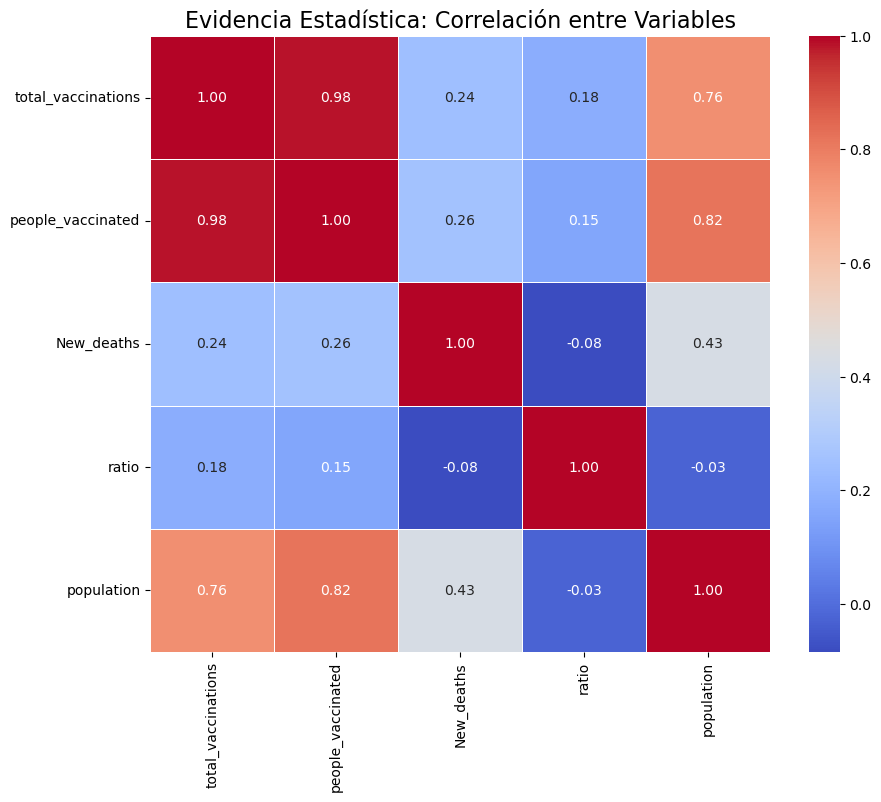

In [35]:
# CÓDIGO FALTANTE 2: Mapa de Calor de Correlación (Para el Acto 3)


# Filtramos solo columnas numéricas relevantes para la correlación
cols_corr = ['total_vaccinations', 'people_vaccinated', 'New_deaths', 'ratio', 'population']
corr_matrix = df[cols_corr].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Evidencia Estadística: Correlación entre Variables', fontsize=16)
plt.show() # Este gráfico confirma la relación inversa (si existe) o directa por volumen